# Лабораторная работа: Анализ данных о пассажирах Титаника


## 1. Как много пассажиров ехало первым классом?
Класс каждого пассажира указан соответствующей фичей, в колонке Pclass нет объектов NaN. Следовательно, для ответа на вопрос достаточно посчитать количество пассажиров с первым классом в файлах.
Ответ: 323

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
#from KaggleAux import predict as ka # see github.com/agconti/kaggleaux for more details

dfTrain = pd.read_csv("data/train.csv")
dfTest = pd.read_csv("data/test.csv")
df = dfTrain.append(dfTest)
answer1 = df.Pclass[df.Pclass == 1].value_counts()
answer1


1    323
dtype: int64

## 2. Какой возраст имели пассажиры?
Наглядным будет следующий график:

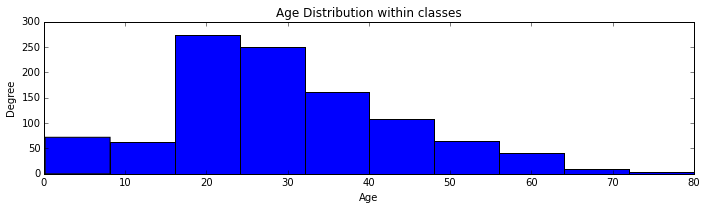

In [6]:
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel desnsity estimate of the subset of the 1st class passanges's age
df.Age.plot(kind='hist')    
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
#plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

## 3. Корреляция числа братьев/сестер и число родителей/детей

In [11]:
cor = df['SibSp'].corr(df['Parch'])
cor

0.37358719062649265

## 4. Какое самое популярное женское имя на корабле?
Самое популярное женское имя - Mary.

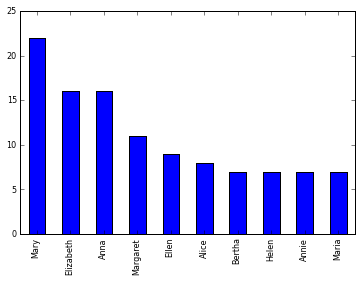

In [15]:
#Extract the first name 
df['FirstName'] = df['Name'].str.extract('(Mr\. |Miss\. |Master. |Mrs\.[A-Za-z ]*\()([A-Za-z]*)')[1] 
df = df[df['Sex'] == 'female']


#for plot a bar chart
ax = df['FirstName'].value_counts().head(10).plot(kind='bar',fontsize=8)
fig = ax.get_figure()

#save to png for display below
fig.savefig('figure.png')

## 5. Как варьируется цена билета на Титаник?


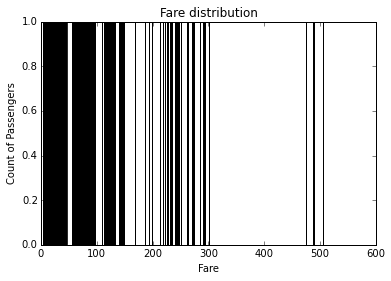

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Fare'], bins = 10, range = (df['Fare'].min(),df['Fare'].max()))
plt.title('Fare distribution')
plt.xlabel('Fare')
plt.ylabel('Count of Passengers')
plt.show()

In [23]:
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

plt.subplot2grid((2,1),(1,0), colspan=2)
# plots a kernel desnsity estimate of the subset of the 1st class passanges's age
df.Fare[df.Embarked == 'S'].plot(kind='kde')
df.Fare[df.Embarked =='Q'].plot(kind='kde')   
df.Fare[df.Embarked == 'C'].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Fare")    
plt.title("Fare Distribution")
plt.legend(('Embarked on S', 'Embarked on Q','Embarked on C'),loc='best');

AttributeError: 'module' object has no attribute 'pyplot'

## 6. Какие титулы имели пассажиры (примеры титула — Mrs., Mr.), едущие различными классами?

In [20]:
import re
# All titles in data is preceded by a ',' and is followed by a '.'
# The .*? makes the '*' operation non greedy! 
titles = df['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])
list(set(titles))

['Major',
 'Master',
 'Mrs',
 'Sir',
 'Don',
 'Dr',
 'Mme',
 'Lady',
 'Capt',
 'Col',
 'Mr',
 'the Countess',
 'Jonkheer',
 'Mlle',
 'Rev',
 'Miss',
 'Dona',
 'Ms']

## 7. Есть ли зависимость между классом и номером билета?


## 8. Какой части пассажиров удалось выжить?

In [73]:
coef = dfTrain.Survived[dfTrain.Survived == 1].value_counts()/float (dfTrain.Survived.size)
coef

1    0.383838
dtype: float64

## 9. Верно ли, что женщины выживали чаще мужчин?
Да, это видно из иллюстрации

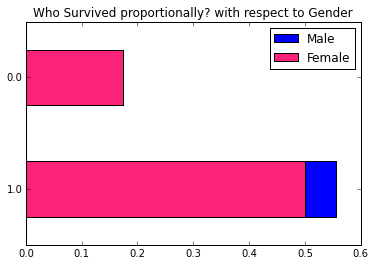

In [77]:
ax2 = fig.add_subplot(122)
(df.Survived[df.Sex == 'male'].value_counts()/float(df.Sex[df.Sex == 'male'].size)).plot(kind='barh',label='Male')  
(df.Survived[df.Sex == 'female'].value_counts()/float(df.Sex[df.Sex == 'female'].size)).plot(kind='barh', color='#FA2379',label='Female')
ax2.set_ylim(-1, 2)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best');

## 10. Верно ли, что чаще выживали пассажиры с более дорогими билетами?
Да, еще как.

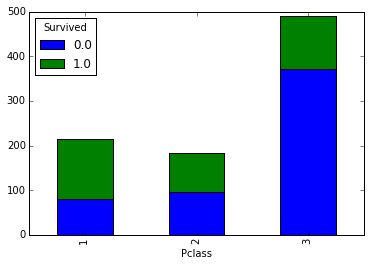

In [5]:
df.pivot_table('PassengerId', 'Pclass', 'Survived', 'count').plot(kind='bar', stacked=True)

## 11. Найдите закономерности, точно описывающие группу выживших пассажиров (все пассажиры, попадающие под правило — выжили). 

## 12. Что можно сказать про сложность и интерпретацию этих закономерностей? 

## 13. Есть ли среди них логичные?

## 14. Есть ли примеры ложных закономерностей?